<a href="https://colab.research.google.com/github/jadinsstewart/Cloud-Services/blob/main/Final_NBA_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ella Archie (ejarchie@calpoly.edu)

Jadin Stewart (jsstewar@calpoly.edu)

GSB S521-01

March 6th, 2023

# <center> **Impact of Home Game Advantage by Sport** <center/>

In [128]:
import pandas as pd  
import json 
from urllib.request import urlopen 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# NBA Data

In [129]:
nba = pd.read_html("https://www.covers.com/sport/basketball/nba/standings/2021-2022")
nba_df = nba[0]
nba_df = nba_df.drop(nba_df.columns[[6,7,8,9]], axis=1)
nba_df.columns = ("Team", "Wins", "Losses", "Win Percent", "Home Record", "Away Record", "b", "c", "d", "e")
nba_df = nba_df.drop(columns=['b', 'c', 'd', 'e'])

team_names = {"Boston":"Celtics","Philadelphia":"76ers","Toronto":"Raptors", "Brooklyn":"Nets","New York":"NY Knicks",
              "Milwaukee":"Bucks","Chicago":"Bulls","Cleveland":"Cavaliers","Indiana":"Pacers",
              "Detroit":"Pistons","Miami":"Heat","Atlanta":"Hawks","Charlotte":"Hornets",
              "Washington":"Wizards","Orlando":"Magic","Utah":"Jazz","Denver":"Nuggets","Minnesota":"Timberwolves",
              "Portland":"Trail Blazers","Oklahoma City":"Thunder","Phoenix":"Suns","Golden State":"Warriors",
              "L.A. Clippers": "Clippers", "L.A. Lakers":"Lakers","Sacramento":"Kings","Memphis":"Grizzlies",
              "Dallas":"Mavericks", "New Orleans":"Knicks","San Antonio":"Spurs","Houston":"Rockets"}

nba_df['Team'] = nba_df['Team'].map(team_names)
my_split = nba_df['Home Record'].str.split("-", n = 1, expand = True)
nba_df['Home Wins'] = my_split[0]
nba_df['Home Losses'] = my_split[1]
nba_df['Home Wins'] = pd.to_numeric(nba_df['Home Wins'])
nba_df['Home Losses'] = pd.to_numeric(nba_df['Home Losses'])
nba_df['Total Home Games'] = nba_df['Home Wins'] + nba_df['Home Losses']
nba_df['Home Win Percent'] = (nba_df['Home Wins'] / nba_df['Total Home Games']) * 100

my_split2 = nba_df['Away Record'].str.split("-", n = 1, expand = True)
nba_df['Away Wins'] = my_split2[0]
nba_df['Away Losses'] = my_split2[1]
nba_df['Away Wins'] = pd.to_numeric(nba_df['Away Wins'])
nba_df['Away Losses'] = pd.to_numeric(nba_df['Away Losses'])
nba_df['Total Away Games'] = nba_df['Away Wins'] + nba_df['Away Losses']
nba_df['Away Win Percent'] = (nba_df['Away Wins'] / nba_df['Total Away Games']) * 100
nba_df['Home Advantage'] = nba_df['Home Win Percent'] - nba_df['Away Win Percent']

nba_df['Path'] = nba_df['Team'] + '.png'

#  MLB Data

In [130]:
# Home Record
mlb_home = pd.read_html("https://www.teamrankings.com/mlb/trends/win_trends/?sc=is_home&range=yearly_mlb_2021")
mlb_home_df = mlb_home[0]
mlb_home_df = mlb_home_df.drop(mlb_home_df.columns[[2,3,4]], axis=1)
mlb_home_df.columns = ("Team", "Home Record")
my_split = mlb_home_df['Home Record'].str.split("-", n = 2, expand = True)
mlb_home_df['Home Wins'] = my_split[0]
mlb_home_df['Home Losses'] = my_split[1]
mlb_home_df['Home Ties'] = my_split[2]
mlb_home_df['Home Wins'] = pd.to_numeric(mlb_home_df['Home Wins'])
mlb_home_df['Home Losses'] = pd.to_numeric(mlb_home_df['Home Losses'])
mlb_home_df['Home Ties'] = pd.to_numeric(mlb_home_df['Home Ties'])
mlb_home_df['Total Home Games'] = mlb_home_df['Home Wins'] + mlb_home_df['Home Losses'] + mlb_home_df['Home Ties']
mlb_home_df['Home Win Percent'] = (mlb_home_df['Home Wins'] / mlb_home_df['Total Home Games']) * 100

In [131]:
# Away Record
mlb_away = pd.read_html("https://www.teamrankings.com/mlb/trends/win_trends/?sc=is_away&range=yearly_mlb_2021")
mlb_away_df = mlb_away[0]
mlb_away_df = mlb_away_df.drop(mlb_away_df.columns[[2,3,4]], axis=1)
mlb_away_df.columns = ("Team", "Away Record")
my_split2 = mlb_away_df['Away Record'].str.split("-", n = 2, expand = True)
mlb_away_df['Away Wins'] = my_split2[0]
mlb_away_df['Away Losses'] = my_split2[1]
mlb_away_df['Away Ties'] = my_split2[2]
mlb_away_df['Away Wins'] = pd.to_numeric(mlb_away_df['Away Wins'])
mlb_away_df['Away Losses'] = pd.to_numeric(mlb_away_df['Away Losses'])
mlb_away_df['Away Ties'] = pd.to_numeric(mlb_away_df['Away Ties'])
mlb_away_df['Total Away Games'] = mlb_away_df['Away Wins'] + mlb_away_df['Away Losses'] + mlb_away_df['Away Ties']
mlb_away_df['Away Win Percent'] = (mlb_away_df['Away Wins'] / mlb_away_df['Total Away Games']) * 100

In [132]:
# Merge
mlb_df = pd.merge(mlb_home_df, mlb_away_df, on=["Team", "Team"])
mlb_df['Home Advantage'] = mlb_df['Home Win Percent'] - mlb_df['Away Win Percent']

# NFL Data

In [133]:
nfl = pd.read_html("https://www.nfl.com/standings/league/2021/reg")
nfl_df = nfl[0]
nfl_df = nfl_df.drop(nfl_df.columns[[1,2,3,4,5,6,7,10,11,12,13,14,15,16]], axis=1)
my_split = nfl_df['Home'].str.split("-", n = 2, expand = True)
nfl_df['Home Wins'] = my_split[0]
nfl_df['Home Losses'] = my_split[1]
nfl_df['Home Ties'] = my_split[2]
nfl_df['Home Wins'] = pd.to_numeric(nfl_df['Home Wins'])
nfl_df['Home Losses'] = pd.to_numeric(nfl_df['Home Losses'])
nfl_df['Home Ties'] = pd.to_numeric(nfl_df['Home Ties'])
nfl_df['Total Home Games'] = nfl_df['Home Wins'] + nfl_df['Home Losses'] + nfl_df['Home Ties']
nfl_df['Home Win Percent'] = (nfl_df['Home Wins'] / nfl_df['Total Home Games']) * 100

my_split2 = nfl_df['Road'].str.split("-", n = 2, expand = True)
nfl_df['Away Wins'] = my_split2[0]
nfl_df['Away Losses'] = my_split2[1]
nfl_df['Away Ties'] = my_split2[2]
nfl_df['Away Wins'] = pd.to_numeric(nfl_df['Away Wins'])
nfl_df['Away Losses'] = pd.to_numeric(nfl_df['Away Losses'])
nfl_df['Away Ties'] = pd.to_numeric(nfl_df['Away Ties'])
nfl_df['Total Away Games'] = nfl_df['Away Wins'] + nfl_df['Away Losses'] + nfl_df['Away Ties']
nfl_df['Away Win Percent'] = (nfl_df['Away Wins'] / nfl_df['Total Away Games']) * 100
nfl_df['Home Advantage'] = nfl_df['Home Win Percent'] - nfl_df['Away Win Percent']
nfl_df.rename(columns = {"NFL Team": "Team"}, inplace = True)

# MLS Data

In [134]:
# Home
mls = pd.read_html("https://footballdatabase.com/league-scores-tables/united-states-mls-2021")
mls_home_df = mls[1]
mls_home_df = mls_home_df.drop(mls_home_df.columns[[0,2,3,8,9]], axis=1)
mls_home_df.columns = ("Team", "Total Home Games", "Home Wins", "Home Ties", "Home Losses")
mls_home_df['Home Wins'] = pd.to_numeric(mls_home_df['Home Wins'])
mls_home_df['Home Losses'] = pd.to_numeric(mls_home_df['Home Losses'])
mls_home_df['Home Ties'] = pd.to_numeric(mls_home_df['Home Ties'])
mls_home_df['Total Home Games'] = pd.to_numeric(mls_home_df['Total Home Games'])
mls_home_df['Home Win Percent'] = (mls_home_df['Home Wins'] / mls_home_df['Total Home Games']) * 100

In [135]:
# Away
mls = pd.read_html("https://footballdatabase.com/league-scores-tables/united-states-mls-2021")
mls_away_df = mls[2]
mls_away_df = mls_away_df.drop(mls_away_df.columns[[0,2,3,8,9]], axis=1)
mls_away_df.columns = ("Team", "Total Away Games", "Away Wins", "Away Ties", "Away Losses")
mls_away_df['Away Wins'] = pd.to_numeric(mls_away_df['Away Wins'])
mls_away_df['Away Losses'] = pd.to_numeric(mls_away_df['Away Losses'])
mls_away_df['Away Ties'] = pd.to_numeric(mls_away_df['Away Ties'])
mls_away_df['Total Away Games'] = pd.to_numeric(mls_away_df['Total Away Games'])
mls_away_df['Away Win Percent'] = (mls_away_df['Away Wins'] / mls_away_df['Total Away Games']) * 100

In [136]:
# Merge
mls_df = pd.merge(mls_home_df, mls_away_df, on=["Team", "Team"])
mls_df['Home Advantage'] = mls_df['Home Win Percent'] - mls_df['Away Win Percent']

# Merged Data Frame

In [137]:
nba_df['Sport'] = 'Basketball'
mlb_df['Sport'] = 'Baseball'
nfl_df['Sport'] = 'Football'
mls_df['Sport'] = 'Soccer'
nba_df = nba_df[['Team', 'Home Win Percent', 'Away Win Percent', 'Home Advantage', 'Sport']]
mlb_df = mlb_df[['Team', 'Home Win Percent', 'Away Win Percent', 'Home Advantage', 'Sport']]
nfl_df = nfl_df[['Team', 'Home Win Percent', 'Away Win Percent', 'Home Advantage', 'Sport']]
mls_df = mls_df[['Team', 'Home Win Percent', 'Away Win Percent', 'Home Advantage', 'Sport']]
sports_df = pd.concat([nba_df, mlb_df, nfl_df, mls_df], axis=0)


# Visualizations

In [146]:
def getImage(Path):
    return OffsetImage(plt.imread(Path), zoom=.03, alpha = 1)

KeyError: ignored

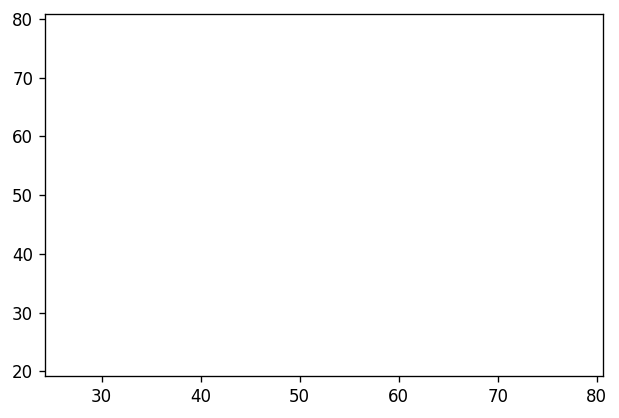

In [147]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(nba_df['Home Win Percent'], nba_df['Away Win Percent'], color='white')

for index, row in nba_df.iterrows():
    ab = AnnotationBbox(getImage(row['Path']), (row['Home Win Percent'], row['Away Win Percent']), frameon=False)
    ax.add_artist(ab)

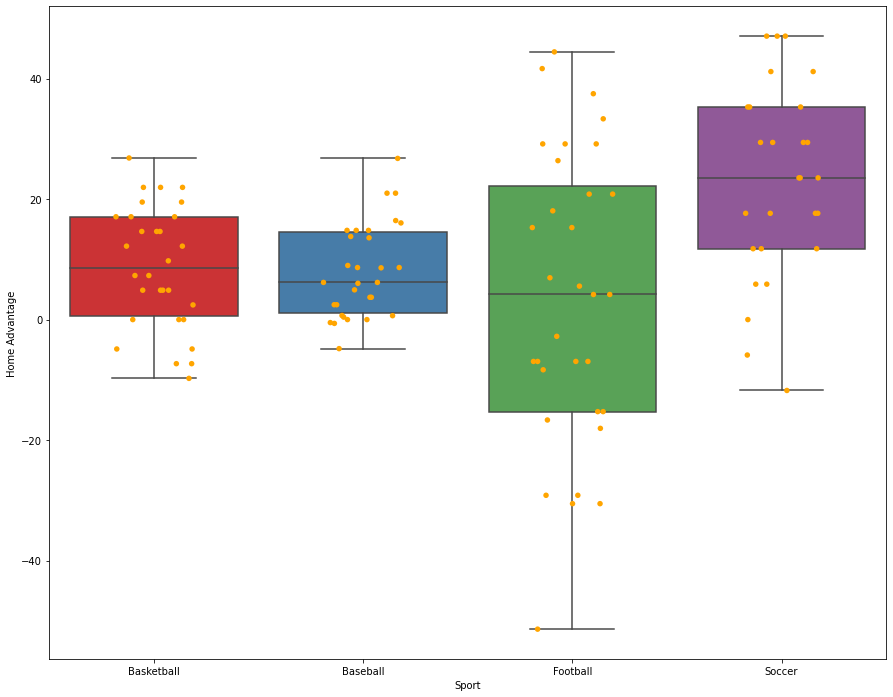

In [140]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.boxplot(x='Sport', y='Home Advantage', data = sports_df, ax = ax, palette = "Set1")
ax = sns.stripplot(x='Sport', y='Home Advantage', data = sports_df, color = "orange", jitter = 0.2, size = 5.5, ax = ax)

# show the graph
plt.show()